In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter

In [5]:
df_raw = pd.read_csv('stock/VNINDEX_data.csv')
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw = df_raw.sort_values(by='Date')
df_raw

,Date,Ngay,Stock,GiaDieuChinh,GiaDongCua,GiaMoCua,GiaCaoNhat,GiaThapNhat,GiaThayDoi,ThayDoiPhanTram,ThayDoi,KhoiLuongKhopLenh,GiaTriKhopLenh,KLThoaThuan,GtThoaThuan
6050,2000-07-28,28/07/2000,VNINDEX,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0(0.00 %),4200,7.040000e+07,0,0
6049,2000-07-31,31/07/2000,VNINDEX,101.55,101.55,101.55,101.55,101.55,1.55,1.55,1.55(1.55 %),10300,1.768900e+08,0,0
6048,2000-08-02,02/08/2000,VNINDEX,103.38,103.38,103.38,103.38,103.38,1.83,1.80,1.83(1.80 %),300,5.160000e+06,0,0
6047,2000-08-04,04/08/2000,VNINDEX,105.20,105.20,105.20,105.20,105.20,1.82,1.76,1.82(1.76 %),3700,6.260000e+07,0,0
6046,2000-08-07,07/08/2000,VNINDEX,106.92,106.92,106.92,106.92,106.92,1.72,1.63,1.72(1.63 %),13100,2.291900e+08,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-06-16,16/06/2025,VNINDEX,1338.11,1338.11,1314.05,1338.72,1313.40,22.62,1.72,22.62(1.72 %),777670300,1.924153e+13,74012829,772511156440
3,2025-06-17,17/06/2025,VNINDEX,1347.69,1347.69,1343.70,1353.01,1339.39,9.58,0.72,9.58(0.72 %),761925600,1.817624e+13,101579380,910024747970
2,2025-06-18,18/06/2025,VNINDEX,1346.83,1346.83,1350.17,1353.99,1341.64,-0.86,-0.06,-0.86(-0.06 %),765955700,1.852275e+13,83715562,630740126280
1,2025-06-19,19/06/2025,VNINDEX,1352.04,1352.04,1346.33,1353.96,1342.08,5.21,0.39,5.21(0.39 %),650526500,1.621153e+13,142317829,2512361073700


In [3]:
df_raw.columns

Index(['Date', 'Ngay', 'Stock', 'GiaDieuChinh', 'GiaDongCua', 'GiaMoCua',
       'GiaCaoNhat', 'GiaThapNhat', 'GiaThayDoi', 'ThayDoiPhanTram', 'ThayDoi',
       'KhoiLuongKhopLenh', 'GiaTriKhopLenh', 'KLThoaThuan', 'GtThoaThuan'],
      dtype='object')

## Phân tích với các kỹ thuật thống kê

Biểu đồ giá đóng cửa của chỉ số VNINDEX theo thời gian

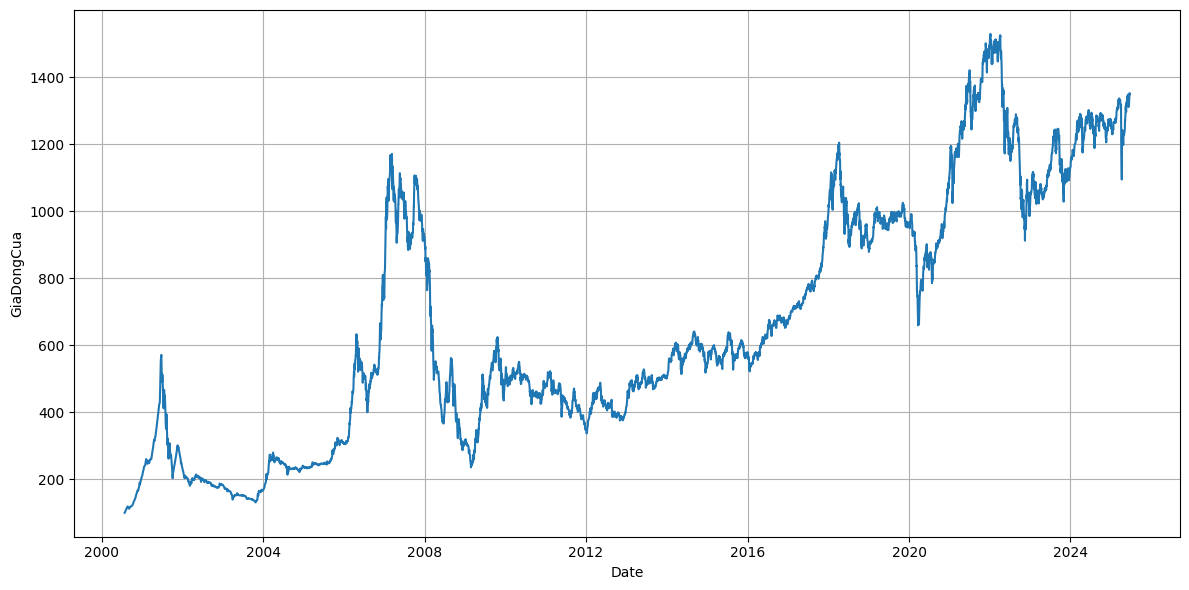

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_raw['Date'], df_raw['GiaDongCua'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('GiaDongCua')
plt.grid(True)
plt.tight_layout()
plt.show()

Biểu đồ khối lượng giao dịch

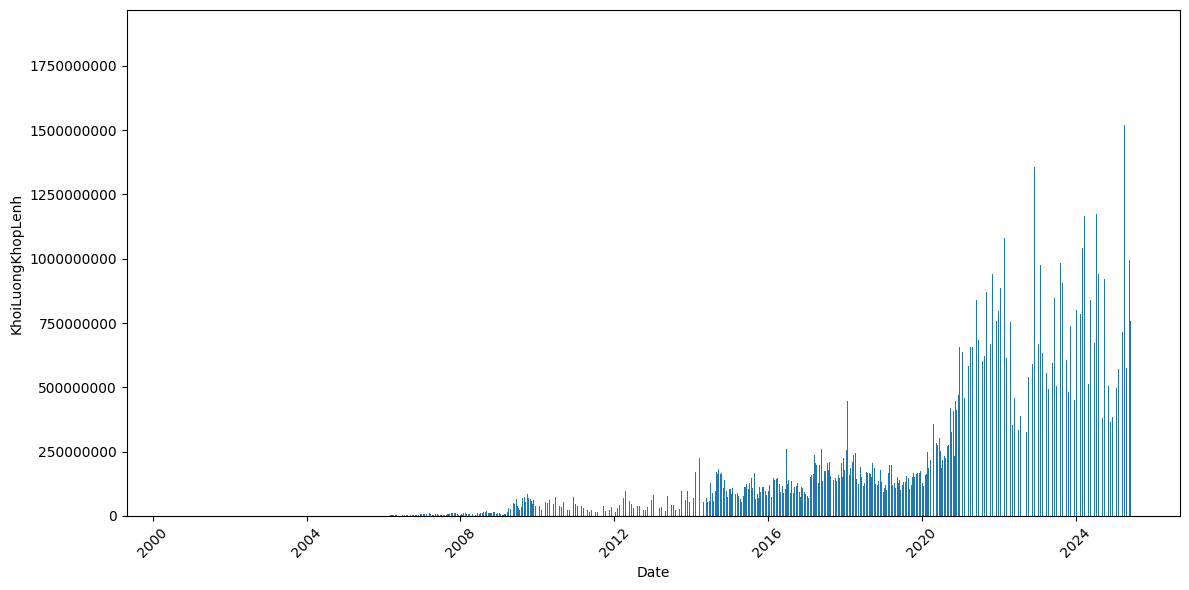

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(df_raw['Date'], df_raw['KhoiLuongKhopLenh'])
plt.xlabel('Date')
plt.ylabel('KhoiLuongKhopLenh')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

Hộp điểm giá đóng cửa

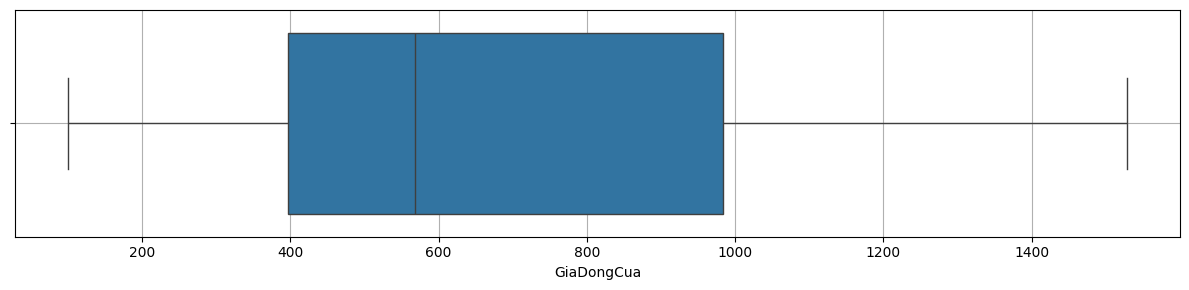

In [14]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df_raw['GiaDongCua'])
plt.xlabel('GiaDongCua')
plt.grid(True)
plt.tight_layout()
plt.show()


Biểu đồ xu hướng giá đóng cửa với đường trung bình động

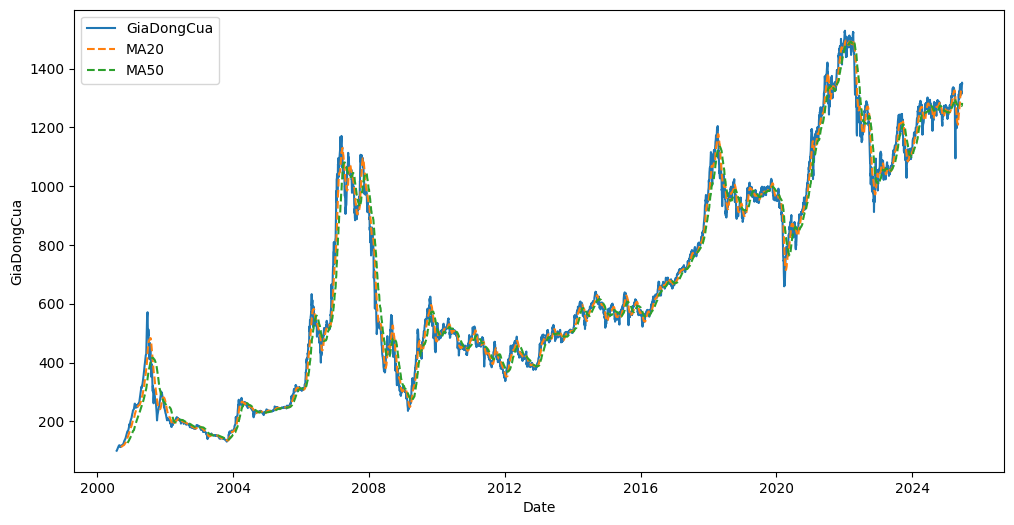

In [15]:
# Plot df_raw['GiaDongCua'] with MA20 MA50
def moving_average(data, window):
    return data.rolling(window=window).mean()

df_raw['MA20'] = moving_average(df_raw['GiaDongCua'], 20)
df_raw['MA50'] = moving_average(df_raw['GiaDongCua'], 50)
plt.figure(figsize=(12, 6))
plt.plot(df_raw['Date'], df_raw['GiaDongCua'], label='GiaDongCua', linestyle='-')
plt.plot(df_raw['Date'], df_raw['MA20'], label='MA20', linestyle='--')
plt.plot(df_raw['Date'], df_raw['MA50'], label='MA50', linestyle='--')
plt.xlabel('Date')
plt.ylabel('GiaDongCua')
plt.legend()